In [1]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import pandas as pd # Библиотека Pandas для работы с табличными данными


from sklearn.preprocessing import StandardScaler
import sklearn.datasets as ds

from sklearn import preprocessing as prep

from sklearn.metrics import silhouette_samples # функция scikit-learn для оценки Коэффициента Силлуэта

import seaborn as sns# библиотека Seaborn для визуализации данных из Pandas

import matplotlib # библиотека Matplotlib для визуализации
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
# по разному импортируем потому что в модуле pyplot много рисования (и удобней сократить при применении),
# но нам понадобится ещё кое-что из matplotlib

from sklearn.cluster import KMeans # Кластеризация К-Средних от scikit-learn

In [52]:
plt.style.use('seaborn-v0_8-dark')

Наши подготовительные функии из предыдущих блокнотов

In [43]:
def plot_silhouette_results(X,centroids,labels, label_centroids, axis_x, axis_y):
    """Визуализация результатов кластеризации и коэффициентов силуэта
    Входные переменные:
    ===========
    X: признаки
    centroids: центры кластеров
    labels: метки кластеров для данных
    centroids: метки центров кластеров
    axis_x: какую ось рисовать в качестве Х
    axis_y: какую ось рисовать в качестве У
    """

    # создаем большое полотно
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(25  , 5)

    # считаем коэффициенты силуэта через функцию scikit-learn
    silhouette_vals = silhouette_samples(X, labels)

    # выбираем цветовую карту - мне нравится 'bwr'
    cmap = matplotlib.colormaps['bwr']
    y_lower, y_upper = 0, 0
    # перебираем все метки кластеров
    for i, cluster in enumerate(np.unique(labels)):
        # отбираем коэффициент силуэта для текущей метки
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        # сортируем
        cluster_silhouette_vals.sort()

        # визуализируем
        # определяем верхнюю границу рисования (по вертикали
        y_upper += len(cluster_silhouette_vals)  # как количество объектов с текущей меткой
        c = cluster /max(labels) # считаем "координату" метки кластера в цветовой карте
        # с помощью горизонтальных полос визуализируем коэффициенты силуэта
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals,color = cmap(c), edgecolor='none', height=1)
        # "слева" напишем номер метки кластеров
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        # переопределим нижнюю границу рисования  (по вертикали)
        y_lower += len(cluster_silhouette_vals)  # (предыдущая верхняя граница)

    # оцениваем среднее значение коэффициента силлуэта
    avg_score = np.mean(silhouette_vals)
    # визуализируем через вертикальную линию
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Коэффициент Силуэта')
    ax1.set_ylabel('Кластеры')


    # визуализируем данные с подракашиванием
    # сначала сами данные
    ax2.scatter(X[:, axis_x], X[:, axis_y], c=labels, alpha = 0.7,  cmap = 'bwr',)
    # а потом центры кластеров, но большими кругами
    ax2.scatter(centroids[:, axis_x], centroids[:, axis_y], c=label_centroids, cmap = 'bwr', edgecolors = 'k', s=400)
    ax2.set_xlabel(new_names[axis_x])
    ax2.set_ylabel(new_names[axis_y])
    ax2.set_aspect('equal')
    plt.tight_layout();

In [44]:
def plot_multi(data, y,  names, sub, size):
    axis = [[0,1],
            [2,1],
            [0,3],
            [2,3],]


    labels = [['',names[1]],
            ['',''],
            [names[0],names[3]],
            [names[2],'']]



    for n, (axi, label, ax) in enumerate(zip(axis,  labels, sub.flatten())):
        scatter = ax.scatter(data[:,axi[0]],data[:,axi[1]],
                             c=y, s = size, cmap = 'bwr',
                             alpha = 0.7, facecolors = 'none' );
        ax.set_ylabel(label[1], fontsize = 20)
        ax.set_xlabel(label[0], fontsize = 20)
        ax.tick_params(axis='x', labelsize= 15)
        ax.tick_params(axis='y', labelsize= 15)
        ax.grid()
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Clusters",
                        fontsize = 15)
        ax.add_artist(legend1)

**Данные вин**

данные вин, используемые в задачах классификации

```
The wine dataset is a classic and very easy multi-class classification dataset.
=================   ==============
Classes                          3
Samples per class       [59,71,48]
Samples total                  178
Dimensionality                   13
Features            real, positive
=================   ==============
```

In [45]:
data_wine=ds.load_wine() # загружаем данные в виде словаря

In [46]:
DF = pd.DataFrame(data_wine.data,columns=data_wine.feature_names) # взяли из словаря по ключевым словам data и feature_names
DF

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Стандартизируем данные

In [47]:
Standard = prep.StandardScaler().fit(DF)
Standard.mean_, Standard.scale_

(array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
        9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
        1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
        7.46893258e+02]),
 array([8.09542915e-01, 1.11400363e+00, 2.73572294e-01, 3.33016976e+00,
        1.42423077e+01, 6.24090564e-01, 9.96048950e-01, 1.24103260e-01,
        5.70748849e-01, 2.31176466e+00, 2.27928607e-01, 7.07993265e-01,
        3.14021657e+02]))

применяем трансформацию .transform

И пакуем результат в отдельный Dataframe

In [48]:
scaled = Standard.transform(DF)
DF_scaled = pd.DataFrame(scaled)
DF_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


### Кластеризация к-Means

Создаем объект, в котором можем менять гиперпараметры
В случае кластеризации k-Means меняем

n_clusters - потенциальное число кластеров
Традиционно обучаем методом .fit() (указываем только X - это же обучение без учителя)

Делаем предсказания - доступен .predict() (т.е. можно подставлять новые данные)

Анализируем результат (в этом случае предлагается визуализация с подсцветкой, а так же демонстрация центров кластеров, которые берутся из атрибута .cluster_centers_)

Кластеризация k-Means

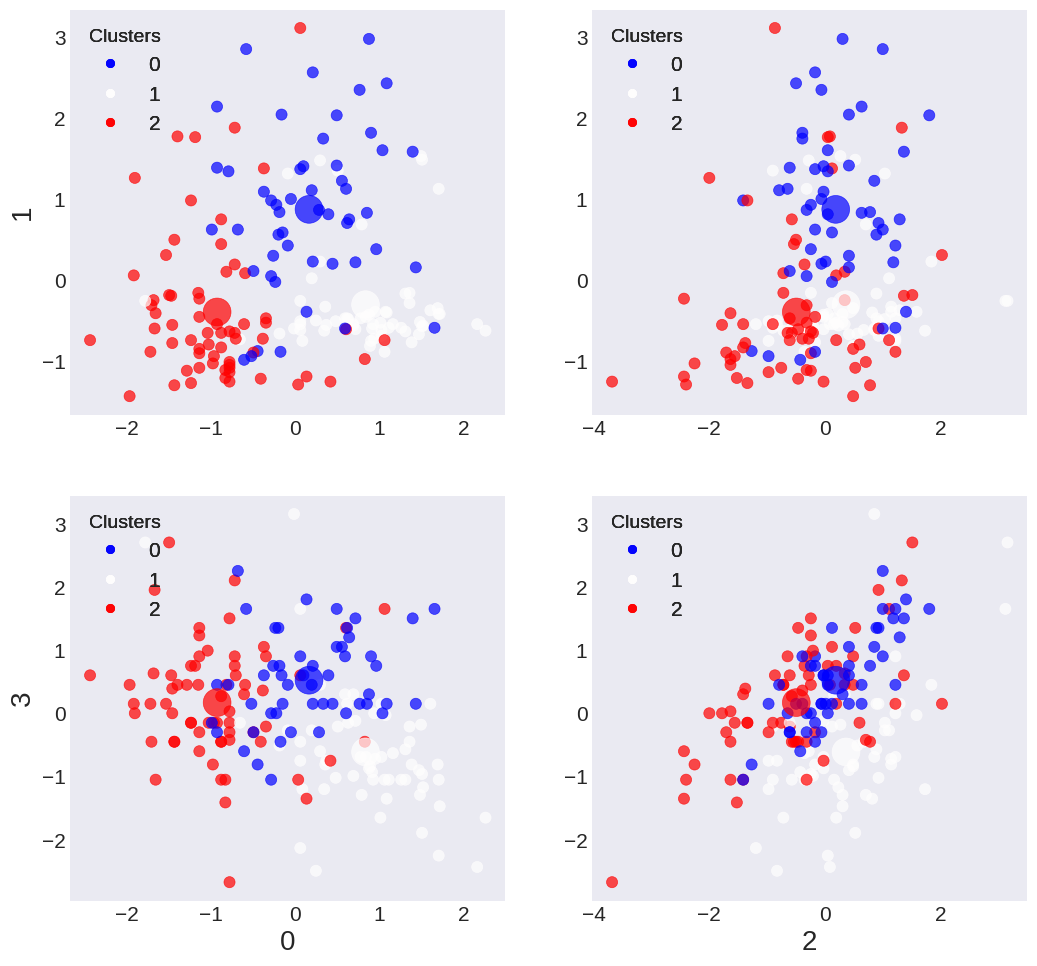

In [53]:
#@title Кластеризация k-Means { run: "auto" }
#@markdown ### Данные (оригинальные или стандартизированные)
dataframe = DF_scaled  #@param [ "DF" , "DF_scaled"]{type:"raw"}
#@markdown ### Число кластеров
k = 3 #@param {type:"slider", min:2, max:10, step:1}

X = dataframe.values

# создаем объект
km = KMeans(n_clusters=k,
            n_init = 10)

# обучаем на данных
km.fit(X)
# предсказываем метки кластеров для данных
labels = km.predict(X)
# "забираем" координаты центров
centroids = km.cluster_centers_
# предсказываем метки для центроидов
label_centroids = km.predict(centroids)

#Визуализация 4-х проекций данных
fig, sub = plt.subplots(2, 2, figsize = (11,11))
plot_multi(X, labels,
           dataframe.columns,
           sub, size = 64);


plot_multi(centroids, label_centroids,
           dataframe.columns,
           sub, size = 400);

Обращаем внимание на то, что в рамках отдельных проекций есть перемешивание , но это потому что кластеризация - это про расстояние и учитывает ВСЕ признаки (и могут выглядеть странно для некоторых признаков отдельно)

Связь кластеров и меток

In [22]:
df_temp = pd.DataFrame(data = data_iris.target, columns = ['target'])
df_temp['labels'] = labels
pd.crosstab(df_temp['labels'], df_temp['target'])

target,0,1,2
labels,,,
0,0,65,0
1,0,3,48
2,59,3,0


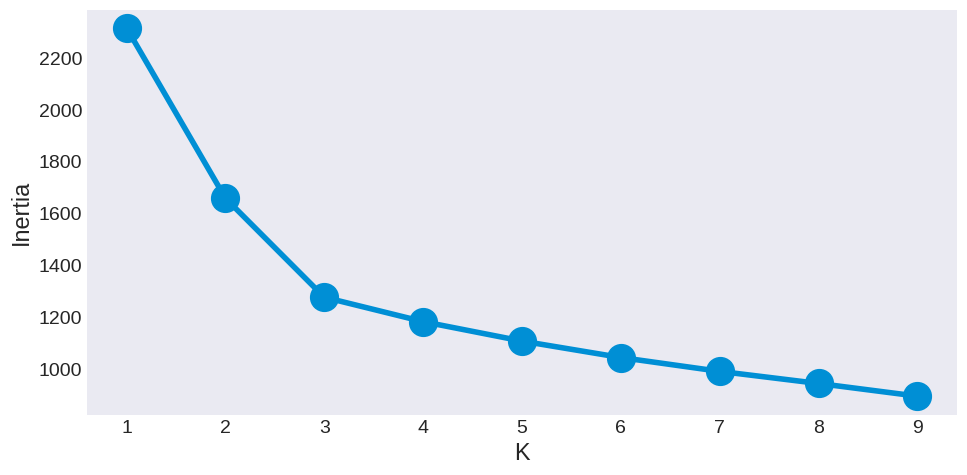

In [54]:
#@title Оценка количества кластеров методом «Локоть» { run: "auto" }
#@markdown ### Данные (оригинальные или стандартизированные)

dataframe = DF_scaled  #@param [ "DF" , "DF_scaled"]{type:"raw"}
X = dataframe.values

sse = [] # здесь будем хранить инерции для конкретных к
list_k = list(range(1, 10))
for k in list_k: # тестируем различные к в диапазоне от 1 до 10
    km = KMeans(n_clusters=k, # создаем объект кластеризации с заданным к
            n_init = 10)
    km.fit(X) # обучаем
    sse.append(km.inertia_) # фиксируем текущую инерцию

# визуализируем метод локтя

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o', markersize = 20)
plt.xlabel('K')
plt.ylabel('Inertia');

3 кластера - скорее всего нормально с т.з. Инерции

NameError: name 'new_names' is not defined

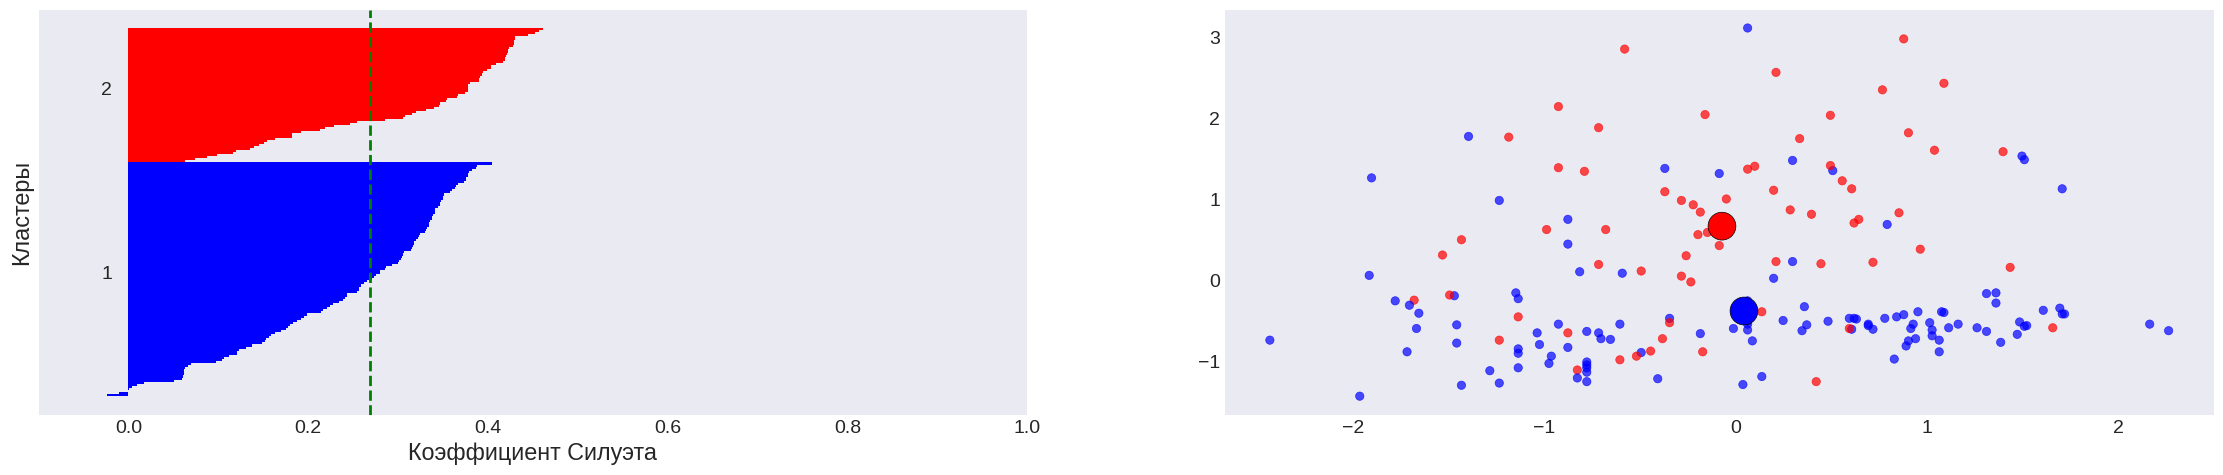

In [65]:
#@title Коэффициент силуэта для результатов кластеризации { run: "auto" }
#@markdown ### Данные (оригинальные или стандартизированные)
dataframe = DF_scaled  #@param [ "DF" , "DF_scaled"]{type:"raw"}
#@markdown ### Число кластеров
k = 2 #@param {type:"slider", min:2, max:10, step:1}
#@markdown ### Оси для отрисовки
#@markdown ### Ось x
axis_x = 0 #@param {type:"slider", min:0, max:3, step:1}
#@markdown ### Ось y
axis_y = 1 #@param {type:"slider", min:0, max:3, step:1}

X = dataframe.values
# создаем объект
km = KMeans(n_clusters=k,
            n_init = 10)
# обучаем на данных
km.fit(X)
# предсказываем метки кластеров для данных
labels = km.predict(X)
# "забираем" координаты центров
centroids = km.cluster_centers_
# предсказываем метки для центроидов
label_centroids = km.predict(centroids)

# Визуализация и данных, и коэффициентов силуэта
plot_silhouette_results(X,centroids,
                        labels, label_centroids,
                        axis_x, axis_y)

не смог разобраться с данной ошибкой...

в силуэте кластера много низких и отрицательных значений, это говорит о том, что кластерная структура плохо соответствует естественным группам данных